# Task 1 -  KNN

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from math import sqrt
from sklearn.metrics import mean_squared_error

In [8]:
data=pd.read_csv(r'C:\Users\ASUS\Downloads\nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [9]:
data.drop(['player','season','season_end'],axis=1,inplace=True)

new_data=data.copy()


new_data.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328


(0, 31)

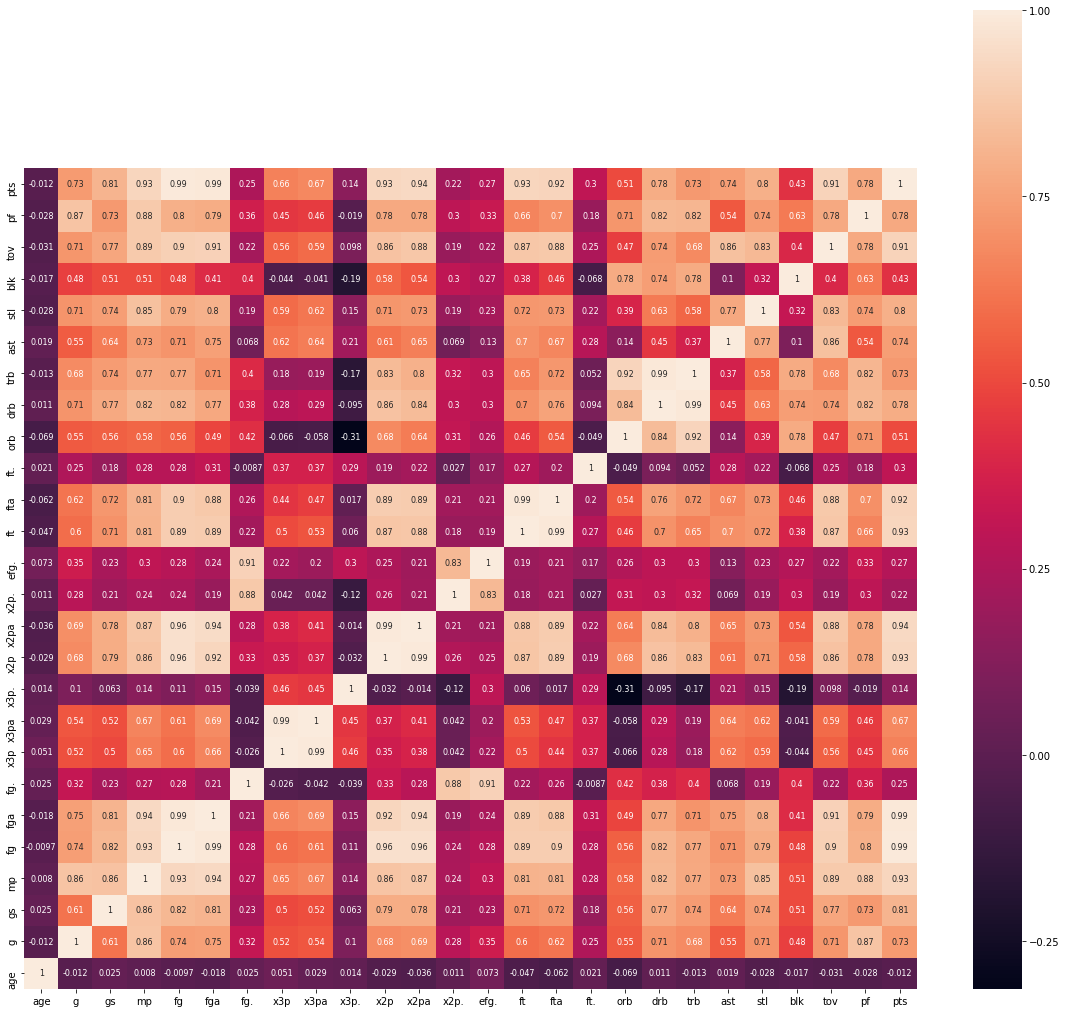

In [10]:
corr = new_data.corr()

fig, ax = plt.subplots(figsize = (20, 18))
sns.heatmap(corr, annot = True, annot_kws={'size': 8})
ax.set_ylim(0 ,31)

In [11]:
new_data.isnull().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
dtype: int64

In [12]:
new_data.drop('x3p.',axis=1,inplace=True)

In [13]:
new_data.fillna(new_data.mean(),inplace=True)

In [14]:
position_mapping={'SF': 0, 'C': 1, 'PF': 2,'SG':3,'PG':4,'G':5,'F':6}

new_data['pos'] = new_data['pos'].map(position_mapping)

team_mapping={'TOT':0, 'OKC':1, 'ORL':2, 'NOP':3, 'NYK':4, 'POR':5, 'MIA':6, 'MEM':7, 'BRK':8,
       'PHI':9, 'MIL':10, 'ATL':11, 'WAS':12, 'GSW':13, 'DEN':14, 'HOU':15, 'SAS':16, 'BOS':17,
       'PHO':18, 'MIN':19, 'LAC':20, 'CLE':21, 'UTA':22, 'DET':23, 'CHA':24, 'DAL':25, 'CHI':26,
       'LAL':27, 'IND':28, 'TOR':29, 'SAC':30}
new_data['bref_team_id'] = new_data['bref_team_id'].map(team_mapping)

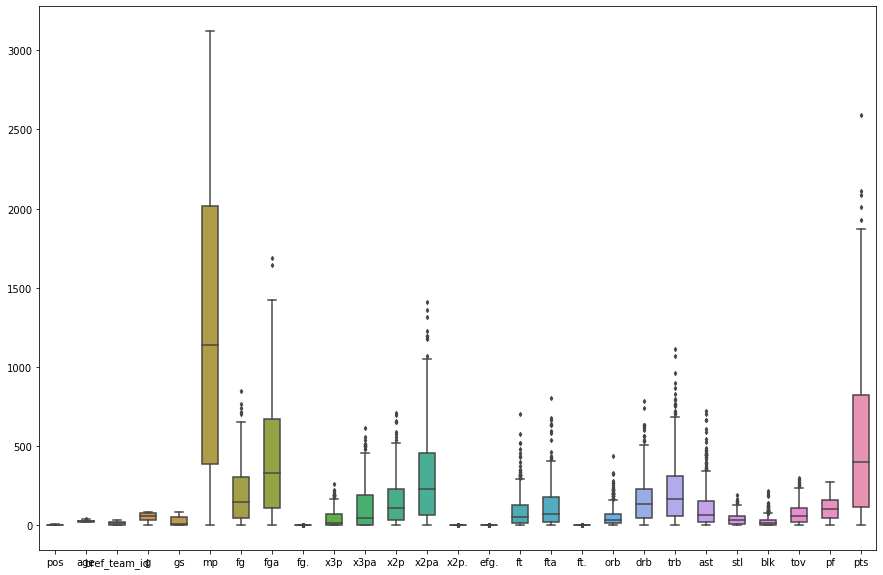

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)

In [16]:
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR= Q3-Q1
IQR

new_data = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(new_data.shape)


copy_data=new_data.copy()

(330, 27)


In [17]:
y=copy_data['pts']
X=copy_data.drop('pts',axis=1)


### Scaling Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled=scaler.transform(X)

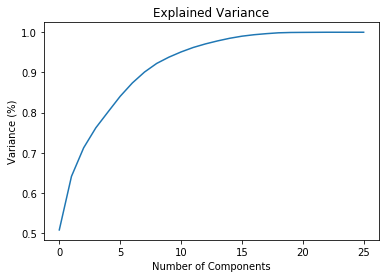

In [18]:
### Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state= 355)

### Implementing graph for PCA

from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [19]:
### Defining PCA Component 

pca = PCA(n_components=9) # as 95% variance lies in 9 components from above graph
pca_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(pca_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])

RMSE value for k=  1 is: 101.1336249771069
RMSE value for k=  2 is: 85.74875208916154
RMSE value for k=  3 is: 77.70058940390946
RMSE value for k=  4 is: 73.77627506608248
RMSE value for k=  5 is: 73.26780267683009
RMSE value for k=  6 is: 71.31929752721582
RMSE value for k=  7 is: 74.87829471054359
RMSE value for k=  8 is: 75.02179291964961
RMSE value for k=  9 is: 77.03528148090328
RMSE value for k=  10 is: 78.02781620044291
RMSE value for k=  11 is: 76.78197319877795
RMSE value for k=  12 is: 77.35833192331225
RMSE value for k=  13 is: 77.34953542566377
RMSE value for k=  14 is: 79.0195821425754
RMSE value for k=  15 is: 78.35308641267949
RMSE value for k=  16 is: 77.50845328002045
RMSE value for k=  17 is: 77.91002056695231
RMSE value for k=  18 is: 77.77460892213888
RMSE value for k=  19 is: 78.9845901975938
RMSE value for k=  20 is: 79.19220608778684


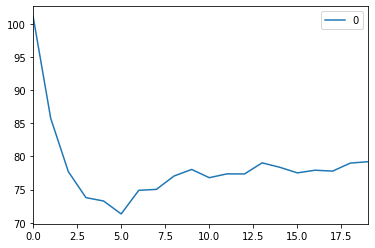

In [20]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 50)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [21]:
knn=KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train,y_train)
print("Trainig Score: ",knn.score(x_train,y_train))
print("Testing Score: ",knn.score(x_test,y_test))

### With K fold Cross Validation

kfold = KFold(n_splits=10,random_state= 42)
kfold.get_n_splits(principal_x)

from statistics import mean
knn = KNeighborsRegressor(n_neighbors = 6)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

Trainig Score:  0.9655530832207377
Testing Score:  0.943151904544993
for k =  1
train_score is :   0.9707820515539011 and test score is :   0.9331051718557686
for k =  2
train_score is :   0.9673084563098829 and test score is :   0.9615335037245903
for k =  3
train_score is :   0.966119617664388 and test score is :   0.9751358493644998
for k =  4
train_score is :   0.9706724213226797 and test score is :   0.9596199230865355
for k =  5
train_score is :   0.9676940725217436 and test score is :   0.9670912225069194
for k =  6
train_score is :   0.9709409772790442 and test score is :   0.9545644425690453
for k =  7
train_score is :   0.9686235637935676 and test score is :   0.9578401244225767
for k =  8
train_score is :   0.971083878344376 and test score is :   0.9381377838722135
for k =  9
train_score is :   0.9714485774439189 and test score is :   0.9413021333301033
for k =  10
train_score is :   0.9669834525060849 and test score is :   0.9573595496262522
********************************

# Task 2  -  urllib & Beautifulsoup

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

In [28]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation

# We get the url
url = requests.get("https://en.wikiquote.org/wiki/Khalil_Gibran")
soup = BeautifulSoup(url.content)

# We get the words within paragrphs
text_p = (''.join(s.findAll(text=True))for s in soup.findAll('p'))
c_p = Counter((x.rstrip(punctuation).lower() for y in text_p for x in y.split()))

# We get the words within divs
text_div = (''.join(s.findAll(text=True))for s in soup.findAll('div'))
c_div = Counter((x.rstrip(punctuation).lower() for y in text_div for x in y.split()))

# We sum the two countesr and get a list with words count from most to less common
total = c_div + c_p
mostCommonWords = total.most_common() 

In [30]:
mostCommonWords

[('the', 2124),
 ('and', 1635),
 ('of', 1005),
 ('in', 633),
 ('i', 592),
 ('to', 560),
 ('a', 542),
 ('that', 435),
 ('is', 377),
 ('not', 375),
 ('my', 365),
 ('he', 339),
 ('was', 314),
 ('but', 303),
 ('you', 287),
 ('your', 284),
 ('his', 268),
 ('me', 248),
 ('for', 244),
 ('it', 237),
 ('man', 212),
 ('from', 210),
 ('be', 196),
 ('have', 195),
 ('we', 192),
 ('all', 186),
 ('are', 179),
 ('with', 176),
 ('him', 174),
 ('who', 172),
 ('they', 166),
 ('our', 162),
 ('shall', 155),
 ('what', 143),
 ('love', 142),
 ('on', 138),
 ('soul', 128),
 ('by', 119),
 ('would', 118),
 ('jesus', 115),
 ('heart', 107),
 ('their', 107),
 ('as', 106),
 ('life', 105),
 ('thought', 100),
 ('its', 97),
 ('us', 97),
 ('do', 97),
 ('this', 93),
 ('gibran', 92),
 ('god', 90),
 ('when', 88),
 ('know', 85),
 ('own', 85),
 ('master', 84),
 ('say', 82),
 ('earth', 78),
 ('spirit', 78),
 ('has', 77),
 ('which', 77),
 ('only', 72),
 ('or', 71),
 ('there', 71),
 ('at', 70),
 ('no', 70),
 ('am', 66),
 ('too',

# Task 3

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.

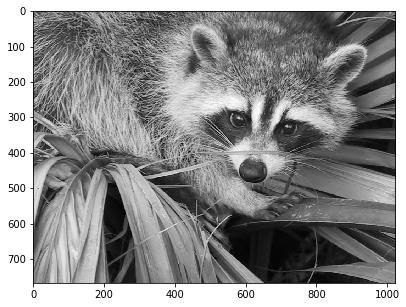

In [46]:

import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline


f = scipy.misc.face(gray=True)
plt.figure(figsize=(10,5))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

In [47]:
rows = f.shape[0]
cols = f.shape[1]


image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

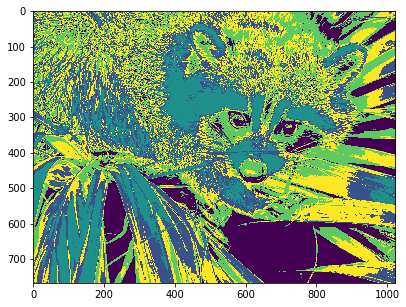

In [49]:
clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 

plt.imsave('compressed_racoon.png',labels);



image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.show()

# Task 4  - 3D Plot

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [174]:
df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])


features = ['sepal length', 'sepal width', 'petal length', 'petal width']

y = df['target']
x = df.drop(['target'],axis=1)

x = StandardScaler().fit_transform(x)

In [175]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [176]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


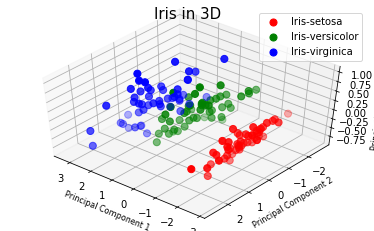

In [177]:
fig = plt.figure(1, figsize=(5, 3))

ax = Axes3D(fig,  elev=50, azim=130)

ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_zlabel('Principal Component 3', fontsize = 8)
ax.set_title('Iris in 3D', fontsize = 15)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    tar = finalDf['target'] == target
    ax.scatter(finalDf.loc[tar, 'principal component 1'], finalDf.loc[tar, 'principal component 2']
               , finalDf.loc[tar, 'principal component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# Task 5  - ARIMA Model

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

In [52]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [153]:

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv(r'C:\Users\ASUS\Desktop\sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')
series.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


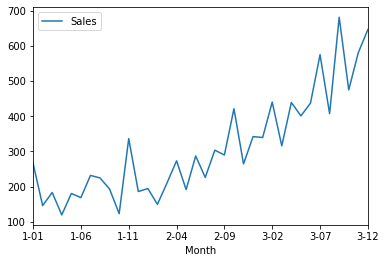

In [154]:

series.plot()

In [155]:
X = series.values

size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [156]:
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964461, expected=421.600000
predicted=290.313889, expected=264.500000
predicted=349.117793, expected=342.300000
predicted=306.512947, expected=339.700000
predicted=387.376475, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308816, expected=439.300000
predicted=356.082003, expected=401.300000
predicted=446.379451, expected=437.400000
predicted=394.737308, expected=575.500000
predicted=434.915490, expected=407.600000
predicted=507.923462, expected=682.000000
predicted=435.482756, expected=475.300000
predicted=652.743802, expected=581.300000
predicted=546.343484, expected=646.900000
Test MSE: 7547.807


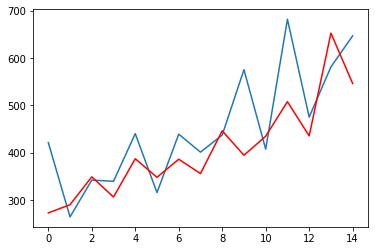

In [157]:
plt.plot(test)
plt.plot(predictions, color='red')